In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
df=pd.DataFrame(pd.read_excel("E:\Study\AIDS\DS\ML\ShopSmart_Customer_Data.xlsx"))
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\huzef\AppData\Local\Temp\ipykernel_17188\917413200.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.DataFrame(pd.read_excel("E:\Study\AIDS\DS\ML\ShopSmart_Customer_Data.xlsx"))


,customer_id,age,gender,membership_duration_months,total_purchases,avg_order_value,last_purchase_months_ago,total_returns,support_tickets,website_visits_last_month,cart_abandonment_rate,payment_method,preferred_category,subscription_status,churned
0,1,40,M,43,15,126.06,0,0,0,16,0.24,PayPal,Electronics,NaN,1
1,2,33,F,1,41,106.86,6,1,1,11,0.08,PayPal,Sports,Premium,1
2,3,42,M,45,39,184.67,9,9,2,12,0.36,Debit Card,Clothing,Basic,1
3,4,53,F,51,2,130.40,10,3,0,9,0.75,PayPal,Home & Garden,Premium,0
4,5,32,M,24,63,203.00,11,4,1,6,0.55,PayPal,Books,NaN,0


In [27]:
df.isnull().sum()

customer_id                   0
age                           0
gender                        0
membership_duration_months    0
total_purchases               0
avg_order_value               0
last_purchase_months_ago      0
total_returns                 0
support_tickets               0
website_visits_last_month     0
cart_abandonment_rate         0
payment_method                0
preferred_category            0
subscription_status           0
churned                       0
dtype: int64

In [26]:
df["subscription_status"].fillna("NONE",inplace=True)

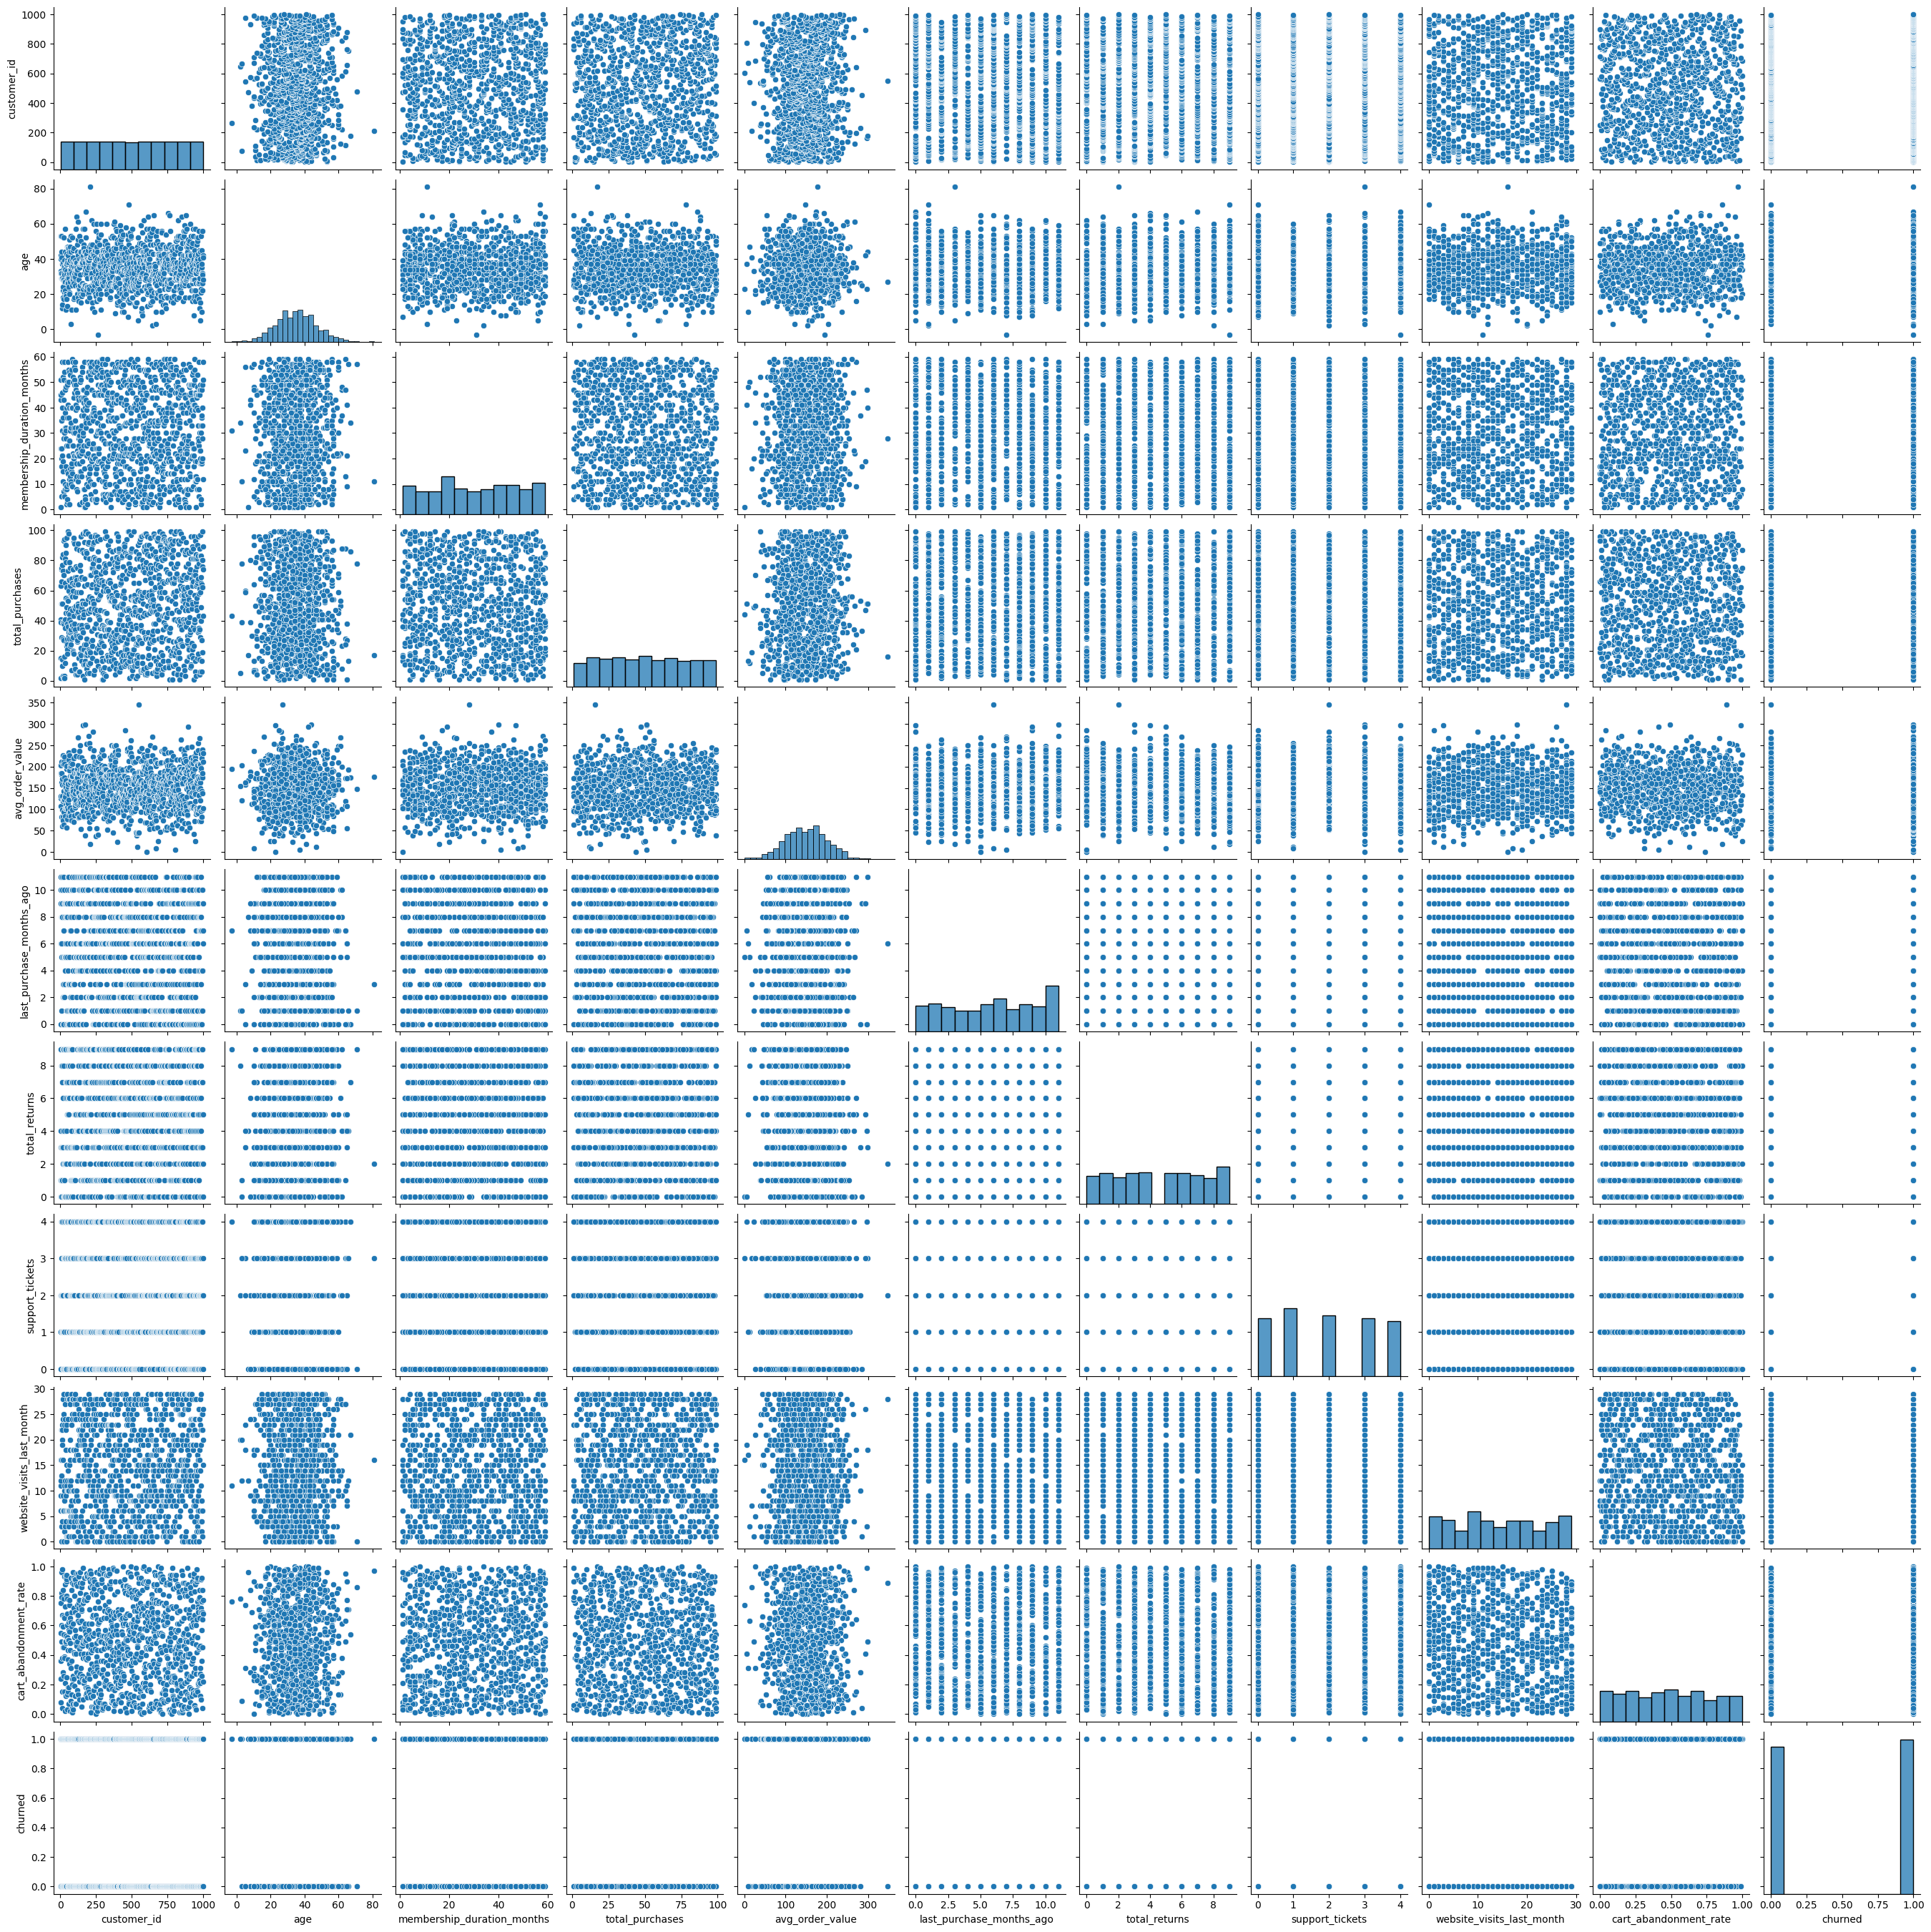

In [9]:
sb.pairplot(data=df)
mat.show()

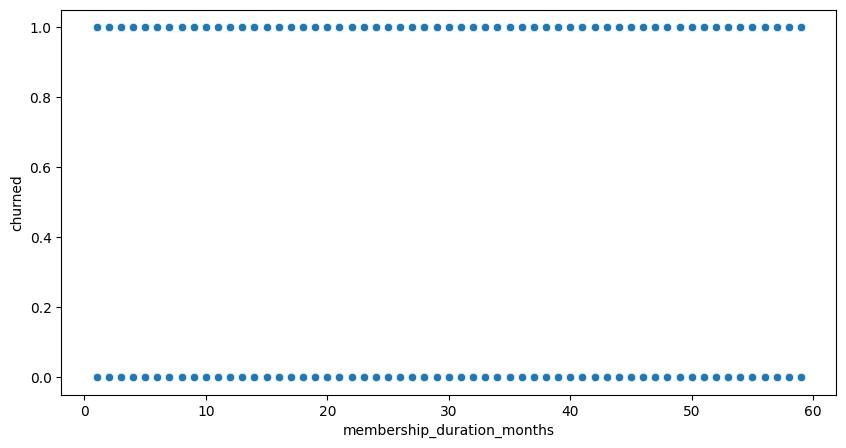

In [ ]:
mat.figure(figsize=(10,5))
sb.scatterplot(x=df["membership_duration_months"],y=df["churned"])
mat.show()

In [29]:
df["subscription_status"].replace({"NONE":0,"Basic":1,"Premium":2},inplace=True)
df

,customer_id,age,gender,membership_duration_months,total_purchases,avg_order_value,last_purchase_months_ago,total_returns,support_tickets,website_visits_last_month,cart_abandonment_rate,payment_method,preferred_category,subscription_status,churned
0,1,40,M,43,15,126.06,0,0,0,16,0.24,PayPal,Electronics,0,1
1,2,33,F,1,41,106.86,6,1,1,11,0.08,PayPal,Sports,2,1
2,3,42,M,45,39,184.67,9,9,2,12,0.36,Debit Card,Clothing,1,1
3,4,53,F,51,2,130.40,10,3,0,9,0.75,PayPal,Home & Garden,2,0
4,5,32,M,24,63,203.00,11,4,1,6,0.55,PayPal,Books,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,31,F,49,76,137.87,4,3,2,22,0.45,Debit Card,Home & Garden,1,0
996,997,56,M,33,80,98.68,1,7,1,22,0.64,Credit Card,Clothing,2,1
997,998,42,F,12,43,211.50,6,0,3,26,0.22,Bank Transfer,Sports,1,0
998,999,28,M,58,74,101.76,7,2,2,20,0.68,Bank Transfer,Clothing,1,1


In [30]:
df.drop(columns=["payment_method","preferred_category","gender"],inplace=True)
df

,customer_id,age,membership_duration_months,total_purchases,avg_order_value,last_purchase_months_ago,total_returns,support_tickets,website_visits_last_month,cart_abandonment_rate,subscription_status,churned
0,1,40,43,15,126.06,0,0,0,16,0.24,0,1
1,2,33,1,41,106.86,6,1,1,11,0.08,2,1
2,3,42,45,39,184.67,9,9,2,12,0.36,1,1
3,4,53,51,2,130.40,10,3,0,9,0.75,2,0
4,5,32,24,63,203.00,11,4,1,6,0.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,31,49,76,137.87,4,3,2,22,0.45,1,0
996,997,56,33,80,98.68,1,7,1,22,0.64,2,1
997,998,42,12,43,211.50,6,0,3,26,0.22,1,0
998,999,28,58,74,101.76,7,2,2,20,0.68,1,1


In [33]:
df.drop(columns=["customer_id"],inplace=True)
x=df.iloc[:,:-1]
y=df["churned"]
x

,age,membership_duration_months,total_purchases,avg_order_value,last_purchase_months_ago,total_returns,support_tickets,website_visits_last_month,cart_abandonment_rate,subscription_status
0,40,43,15,126.06,0,0,0,16,0.24,0
1,33,1,41,106.86,6,1,1,11,0.08,2
2,42,45,39,184.67,9,9,2,12,0.36,1
3,53,51,2,130.40,10,3,0,9,0.75,2
4,32,24,63,203.00,11,4,1,6,0.55,0
...,...,...,...,...,...,...,...,...,...,...
995,31,49,76,137.87,4,3,2,22,0.45,1
996,56,33,80,98.68,1,7,1,22,0.64,2
997,42,12,43,211.50,6,0,3,26,0.22,1
998,28,58,74,101.76,7,2,2,20,0.68,1


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

In [151]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [152]:
lr.score(x_test,y_test)*100

66.5

In [153]:
y_prec=lr.predict(x_test)

In [154]:
conf_matrix=confusion_matrix(y_test,y_prec)
conf_matrix

array([[64, 38],
       [29, 69]], dtype=int64)

In [155]:
accu=accuracy_score(y_test,y_prec)
accu*100


66.5